In [184]:
""" 
NHGISDataRealEstate.ipynb
Using decenial time series data from 1970-2010 we look at basic demographic information that is pertinent to real estate 
in order to look at long term trends of real estate in the USA. This sort of analysis is relevant when looking at long term impacts
of politics, business creation, and technology use. This program will rely on data provided by the NHGIS, which is an
organization that compiles a lot of public data and makes it easy to download in tabular format. This particular notebook
will take a look information such as population, population by age, population by living quarters, median income per capita,
total housing units, total occupancy, total vacancy, and other relevant info. 

"""

import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Insert chart names for desired datafields 
DATAFIELDNAMES = {0 : "Total persons",
                  1 : "Persons in households",
                  2 : "Persons in group quarters",
                  3 : "Per capita income in dollars previous year",
                  4 : "Total housing units",
                  5 : "Total occupied units",
                  6 : "Total vacant units",
                  # TO DO ADD THE REST OF THE FIELDS
                 }

DATAFIELDRANGES = {0 : range(1, 6),
                   1 : range(98, 103),
                   2 : range(103, 108),
                   3 : range(118, 122),
                   4 : range(123, 128),
                   5 : range(128, 133),
                   6 : range(133, 138),
                  }


# Download files to user anaconda directory and read in using 
dfState = pd.read_csv('NHGISTimeSeriesDataRealEstate/nhgis0002_csv/nhgis0002_ts_nominal_state.csv', encoding='latin-1')
dfState = dfState.drop(columns=['GISJOIN', 'STATEFP', 'STATENH'])

dfCounty = pd.read_csv('NHGISTimeSeriesDataRealEstate/nhgis0002_csv/nhgis0002_ts_nominal_county.csv', encoding='latin-1')
dfCounty = dfCounty.drop(columns=['GISJOIN', 'STATEFP', 'STATENH', 'COUNTYFP', 'COUNTYNH'])

dfPlace = pd.read_csv('NHGISTimeSeriesDataRealEstate/nhgis0002_csv/nhgis0002_ts_nominal_place.csv', encoding='latin-1')
dfPlace = dfPlace.drop(columns=['NHGISCODE', 'GJOIN1970', 'GJOIN1980', 'GJOIN1990', 'GJOIN2000', 'GJOIN2010', 'GJOIN2012', 'STATEFP', 'STATENH', 'PLACEA'])

dfState

,STATE,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,162
0,NHGIS Integrated State Name,1970: Persons: Total,1980: Persons: Total,1990: Persons: Total,2000: Persons: Total,2010: Persons: Total,2008-2012: Persons: Total,Margin of error: 2008-2012: Persons: Total,1970: Persons: Under 5 years,1980: Persons: Under 5 years,...,"1970: Housing units: Vacant--For seasonal, rec...","1980: Housing units: Vacant--For seasonal, rec...","1990: Housing units: Vacant--For seasonal, rec...","2000: Housing units: Vacant--For seasonal, rec...","2010: Housing units: Vacant--For seasonal, rec...",1970: Housing units: Vacant--Other vacant,1980: Housing units: Vacant--Other vacant,1990: Housing units: Vacant--Other vacant,2000: Housing units: Vacant--Other vacant,2010: Housing units: Vacant--Other vacant
1,Alabama,3444165,3893888,4040587,4447100,4779736,4777326,0,301031,296412,...,18883,30283,35904,47574,64128,20625,30209,45911,73548,95778
2,Alaska,300382,401851,550043,626932,710231,711139,0,32075,38949,...,4858,11996,17190,21654,28263,2753,4585,11075,6010,9368
3,Arizona,1770900,2718215,3665228,5130632,6392017,6410979,0,158675,213883,...,14723,66498,97030,142601,184865,7043,18537,50490,43026,77775
4,Arkansas,1923295,2286435,2350725,2673400,2915918,2916372,0,158050,175592,...,10963,20965,18667,29389,38498,20536,20324,32759,40006,58640
5,California,19953134,23667902,29760021,33871648,37253956,37325068,0,1642683,1708400,...,128738,181620,198436,239062,304915,40723,89814,123070,139253,213648
6,Colorado,2207259,2889964,3294394,4301261,5029196,5042853,0,186368,216495,...,22258,48116,64621,72712,102489,17130,16556,31817,20977,38748
7,Connecticut,3031709,3107576,3287116,3405565,3574097,3572213,0,253262,185188,...,19705,20696,20475,23517,29673,4927,10060,14729,19588,25874
8,Delaware,548104,594338,666168,783600,897934,900131,0,48472,41151,...,6763,16243,19365,26030,35982,2419,3860,10879,5947,8535
9,District Of Columbia,756510,638333,606900,572059,601723,605759,0,59735,34365,...,1052,903,1663,2254,3545,2271,5219,7285,9363,7211


In [185]:
def plotStateData(states, dataFields, dfState):
    YEARS = [1970, 1980, 1990, 2000, 2010]
    for i in range(len(dataFields)):
        # Create a figure to plot different states for current data field 
        plt.figure(i)
        for j in range(len(states)):
            row = dfState[dfState['STATE'] == states[j]].index.values[0]
            data = dfState.iloc[row, DATAFIELDRANGES[dataFields[i]]].tolist()
            data = [int(k) for k in data]
            plt.plot(YEARS, data)
        
        plt.xlabel("YEAR")
        plt.ylabel(DATAFIELDNAMES[i])
        plt.title(DATAFIELDNAMES[i] + " from 1970-2010")
        plt.legend(states)
        plt.autoscale()
            
            

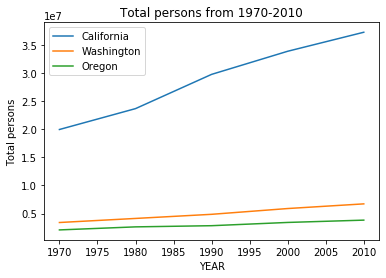

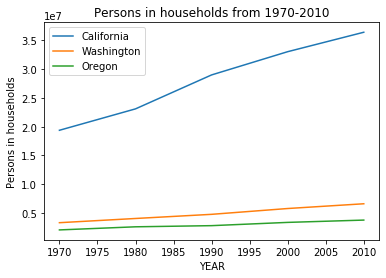

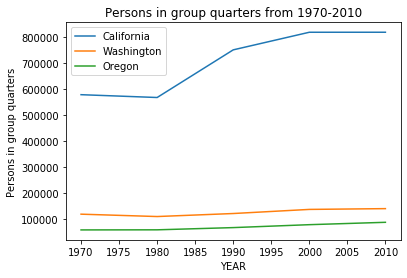

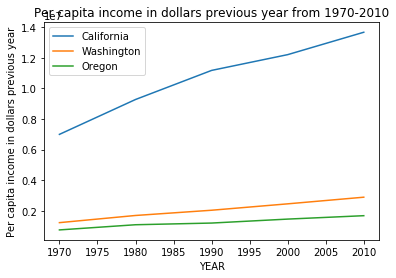

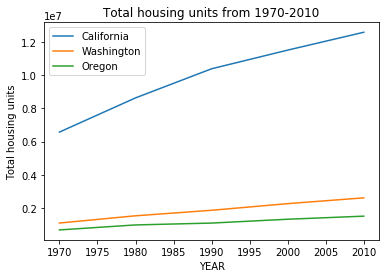

In [186]:
states = ['California', 'Washington', 'Oregon']
plotStateData(states, [0, 1, 2, 4, 5], dfState)